<a href="https://colab.research.google.com/github/david-j-cox/twitter-higher-ed/blob/main/basic_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and modules

Coding is sped up by using code and algorithms that others have already written so we don't have to reinvent the wheel. This next box imports some of the pre-existing we'll use. 

In [1]:
# Packages for path management
import os
import warnings
warnings.filterwarnings("ignore")

# Packages for manipulating data
import numpy as np
from numpy import std, mean, sqrt
import pandas as pd

# Packages for visualizing data
import seaborn as sns 
import matplotlib.pyplot as plt
try:
  import sweetviz as sv
except:
    !pip install sweetviz
    import sweetviz as sv

# Packages for statistics and modeling
from scipy import stats
try:
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
except:
  !pip install vaderSentiment
import spacy
from spacy.lang.en import English
parser = English()
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
try:
  import pyLDAvis
except:
  !pip install pyLDAvis
  import pyLDAvis
import pyLDAvis.gensim_models
import pickle

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidjcox/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidjcox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read in raw data set

In [2]:
# Set the working directory to the corresponding repository
directory = '/Users/davidjcox/Dropbox (Personal)/Projects/Manuscripts In Progress/Empirical/Endicott Data/diversity-survey/'
os.chdir(directory)

# Read in data and make a copy so we don't accidentally damage the raw file
raw_data = pd.read_csv('./data/01_raw/raw_data.csv')
data = raw_data.copy()

In [3]:
# Take a quick peek at every 100th row of the dataframe to make sure nothing looks off
data[::100]

,Time,Consent,Q1 of 20. What is your age?,Q2 of 20. With which gender do you identify?,Q3 of 20. What pronouns do you prefer?,Q4 of 20. With which ethnicity/race do you identify? Please list all that apply.,"Q5 of 20. With which religion do you identify? Please list all that apply, including if you do not identify with a religion.",Q6 of 20. With which political affiliation do you identify?,"Q7 of 20. What is the highest level of education you have completed? (If currently enrolled, please select highest degree received):",Please specify other terminal degree,...,Q18 of 20. Please rate your familiarity with the following terms: (Judaism),Q18 of 20. Please rate your familiarity with the following terms: (No religion (Atheist)),Q18 of 20. Please rate your familiarity with the following terms: (Paganism),Q18 of 20. Please rate your familiarity with the following terms: (Wiccan),Q19 of 20. What actionable items do you recommend we take as a field to increase diversity?,Q20 of 20. Please include any comments or feedback on how the demographic section of this survey can be improved to meet its goal of inclusivity and diversity.,Browser,IP Address,Unique ID,Location
0,10/21/20 12:30,"Yes, I am at least 18 years of age, am a stude...",46-60,Male,He/him/his,Jewish,None,Libertarian,Doctoral degree,NaN,...,Very familiar,Very familiar,Very familiar,Very familiar,"None, treat everyone as an individual and not ...",NaN,Chrome 86.0.4240.75 / Windows,100.12.9.146,682348249,"40.620098114014, -73.751899719238"
100,10/28/20 12:27,"Yes, I am at least 18 years of age, am a stude...",31-45,male,He/him/his,White,None,Democratic Socialist/Democratic Party,Master's degree,NaN,...,Very familiar,Very familiar,Somewhat familiar,Somewhat familiar,Invest in recruiting marginalized population...,NaN,Safari 13.1.2 / OS X,74.85.93.162,688774433,"47.614498138428, -122.34799957275"
200,3/9/21 17:30,"Yes, I am at least 18 years of age, am a stude...",31-45,Male,He/him/his,Caucasion,I do not identify with a religion or any spiri...,Democrat/moderate liberal,Bachelor's degree,NaN,...,Somewhat familiar,Very familiar,Very familiar,Somewhat unfamiliar,I think the field of ABA is new enough that ma...,NaN,Chrome 88.0.4324.182 / Windows,205.118.194.18,776160429,"40.498199462891, -111.84359741211"
300,3/9/21 23:45,"Yes, I am at least 18 years of age, am a stude...",18-30,Female,She/her/hers,Mixed White and Black Caribbean,None,UK - left wing Green Party/labour,Master's degree,NaN,...,Very familiar,Very familiar,Somewhat familiar,Somewhat familiar,Ensure that everyone gets 'a seat at the table...,It was great that fields were left open so I c...,Mobile Safari 12.1.2 / iOS,94.204.111.63,776275507,"24, 54"
400,3/20/21 19:01,"Yes, I am at least 18 years of age, am a stude...",31-45,Female,She/her/hers,White,None,Independent,Master's degree,NaN,...,Very familiar,Very familiar,Very familiar,Very familiar,Looking at socioeconomic background and making...,NaN,Mobile Safari 14.0.3 / iOS,69.207.101.121,781294861,"43.224601745605, -77.592002868652"


### When programming, we often have to specify the column we're interested in looking at. The current column headers are very wordy. We'll rename the column headers to make them easier to work with. 

In [4]:
# Take a look at the existing column headers
list(data)

['Time',
 'Consent',
 'Q1 of 20. What is your age?',
 'Q2 of 20. With which gender do you identify?',
 'Q3 of 20. What pronouns do you prefer?',
 'Q4 of 20. With which ethnicity/race do you identify? Please list all that apply.',
 'Q5 of 20. With which religion do you identify? Please list all that apply, including if you do not identify with a religion. ',
 'Q6 of 20. With which political affiliation do you identify?',
 'Q7 of 20. What is the highest level of education you have completed? (If currently enrolled, please select highest degree received):',
 'Please specify other terminal degree',
 'Q8 of 20. What is your annual household income?',
 'Q9 of 20. Do you identify as having a disability?',
 'If yes and you feel comfortable sharing, please specify:',
 'Q10 of 20. Please select applicable certification and/or licenses (select all that apply):',
 'Q11 of 20. How long have you identified as being in the field of behavior analysis?',
 'Q12 of 20. How long have you been certified an

In [5]:
# Use that text to create shorthand labels
data.columns = ['time', 'consent', 'age', 'gender', 'pronouns', 'ethnicity', 'religion', 'political_affil', 
               'education', 'degree_name', 'income', 'disability', 'disability_name', 'cert_license', 
               'time_in_bx_anal', 'time_cert_license', 'country_live', 'province_live', 'state_live',
               'country_practice', 'province_practice', 'state_practice','define_diversity', 'familiar_cis_fem', 
               'familiar_cis_male', 'familiar_trans_fem', 'familiar_trans_male', 'familiar_non_binary', 
               'familiar_gender_fluid', 'familiar_gender_neutral', 'familiar_asian', 'familiar_black', 
               'familiar_white', 'familiar_latinx', 'familiar_nat_amer', 'familiar_pac_isl', 'familiar_agnostic', 
               'familiar_amish', 'familiar_buddhism', 'familiar_christian', 'familiar_hinduism', 
                'familiar_islam', 'familiar_jehovah', 'familiar_judaism', 'familiar_atheist', 
                'familiar_paganism', 'familiar_wiccan', 'actions_recommend', 'survey_feedback', 
               'browser','ip_address','unique_id','location']

In [6]:
# Save it for future quick use
data.to_csv('./data/03_primary/clean_headers.csv')

## Sweetviz for quick EDA on dataframe

In [7]:
# Run the report
report = sv.analyze(data)

# Show the report
report.show_html(filepath='./figures/sweetviz_report.html', 
                     open_browser=True, 
                     layout='widescreen', 
                     scale=None)

                                             |      | [  0%]   00:00 -> (? left)

Report ./figures/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Topic modeling

In [8]:
# Convert the text data we're interested in to lowercase. 
data['actions_recommend'] = data['actions_recommend'].astype(str)
data['actions_recommend'] = data['actions_recommend'].str.lower()
data['actions_recommend']

0      none, treat everyone as an individual and not ...
1      require furthering education and professional ...
2      define the population, the community, and the ...
3                                                    nan
4      treat all people equally based on work output ...
                             ...                        
402    promote information about the terms that descr...
403    ceus regarding understanding of individuals of...
404    teach courses that demonstrate how to use aba ...
405    giving a platform to those who are traditional...
406                                                  nan
Name: actions_recommend, Length: 407, dtype: object

In [9]:
# Some of the rows express no response differently. Here are those ways:
remove_list = ['-', 'n/a', 'nan']

In [10]:
# Isolate the rows that actually have data in the actions recommend section
df = data[~data['actions_recommend'].isin(remove_list)]
df = df.reset_index(drop=True)
print(f"The number of rows we have with text data = {len(df)}. This is {round((len(df)/len(data))*100, 2)}% of the original dataset.")

The number of rows we have with text data = 321. This is 78.87% of the original dataset.


In [11]:
# Functions we'll need to pre-process the text
def tokenize(text):
    """
    Function that takes a raw text string of one or more 
    sentences and converts it to a list of tokenized words.
    ----------
    Parameters:
        text : str
            Raw text string (i.e., open-response text).
    -------
    Returns                
        List of words from raw text string with punctuation removed. 
    """
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(text)
    return tokens

def get_lemma(word):
    """
    Remove inflectional endings of word to get the base or 
    dictionary form of a word, which is known as the lemma.          
    ----------
    Parameters:
        word : str
            Individual word (i.e., token) from open text-response.
    -------
    Returns                
        Lemma for input word. 
    """
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

def prepare_text_for_lda(text):
    """
    Runs raw open-text string through data pre-processing pipeline
    of tokenizing, removing stopwords, lemmatizing, and 
    removing punctuation. 
    ----------
    Parameters:
        text: str
            Full open-text response from participant. 
    -------
    Returns                
        Description of return value and data/object type
    """
    tokens = tokenize(text) # Tokenize and remove puncutation. 
    tokens = [token for token in tokens if token not in en_stop] # Remove stop words. 
    tokens = [get_lemma(token) for token in tokens] # Lemmatize if relevant. 
    return tokens

def lda_model_grid(df, col, t_start, t_end, params, savename):
    """
    Runs through set of topic model numbers and computes complexity 
    and coherence score. Results allow user to identify the 
    number of topics the researcher will use for  analysis. 
    ----------
    Parameters:
        df : df
            Dataframe from which the text responses reside. 
        col : series
            Column from df where text responses reside. 
        t_start : int
            Minimum number of topics the researcher wants to assess. 
        t_end : int
            Maximum number of topics the researcher wants to assess.
    -------
    Returns                
        New dataframe with the corresponding complexity and coherence
        as columns for each of the topic numbers assessed. 
    """
    df_text = []
    for i in range(len(df)):
      tokens = df[col][i]
      df_text.append(tok for tok in tokens)
      df_text.append(tokens)

    df_dict = corpora.Dictionary(df_text)
    df_corpus = [df_dict.doc2bow(text) for text in df[col]]

    # Create model and save
    topics = []
    complexity = []
    coherence = []
    for i in range(t_start, t_end):
        print(f"Checking model with {i} topics.")
        # Build model
        lda_model = gensim.models.ldamodel.LdaModel(corpus=df_corpus, 
                                                      id2word=df_dict, 
                                                      num_topics=i, 
                                                      random_state=100,
                                                      update_every=1, 
                                                      chunksize=1000, 
                                                      passes=10, 
                                                      alpha='auto', 
                                                      per_word_topics=True)
        if params==False:
            # Compute complexity and coherence score
            cmplx = lda_model.log_perplexity(df_corpus)
            coherence_model_lda = CoherenceModel(model=lda_model, 
                                                texts=df[col], 
                                                dictionary=df_dict, 
                                                coherence='c_v')
            coh = coherence_model_lda.get_coherence()
            topics.append(i)
            complexity.append(cmplx)
            coherence.append(coh)
        
        if params==True:
            lda_model.save(f'./data/07_model_output/{savename}.gensim')
            all_topics = lda_model.print_topics(num_words=50)
            all_topics = pd.DataFrame(all_topics)
            all_topics.to_csv(f'./data/07_model_output/topic_words_{savename}.csv')
            pyLDAvis.enable_notebook()
            lda_display = pyLDAvis.gensim_models.prepare(lda_model, 
                                                      df_corpus, 
                                                      df_dict, 
                                                      sort_topics=False)
            pyLDAvis.display(lda_display)
            pyLDAvis.save_html(lda_display, f'./figures/lda_vis_{savename}.html')

    # Save as a df
    df_df = pd.DataFrame({'topics': topics, 
                        'complexity':complexity, 
                        'coherence':coherence})
    return df_df

def line_plot(df, col, save_name, title):
    """
    Simple line plot for specified column in dataframe.            
    ----------
    Parameters:
        df : dataframe
            Dataframe containing data you want to plot. 
        col : series
            Column containing the data you want to plot. 
        save_name : str
            String used as the name when saving the plotted image. 
        title : str
            Title to be shown at top of plot. 
    -------
    Returns                
        Image display of plot plus saved image file. 
    """
    plt.figure(figsize=(10, 7))
    plt.plot(df['topics'], df[col], marker='o', color='k')
    #   sns.lineplot(x='topics', y='complexity', marker='o', size=15, color='k', data=df, legend=False)
    plt.ylabel(col, fontsize=24, labelpad=20)
    plt.yticks(fontsize=18)
    plt.xlabel("Topics", fontsize=24, labelpad=20)
    plt.xticks(ticks=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 
             labels=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 
             fontsize=18)
    plt.title(title, loc='right', pad=-20)
    plt.savefig(f'./figures/{save_name}.png', bbox_inches='tight')
    plt.show()

## Text Cleaning

In [12]:
# Clean up data for topic modeling
import random
df['actions_recommend'] = df['actions_recommend'].astype(str)
text_data = []
for i in range(len(df)):
    tokens = prepare_text_for_lda(df['actions_recommend'][i])
    text_data.append(tokens)
    if random.random()>0.97:
        print(tokens)

df['token_text'] = text_data

['unconscious', 'bias', 'training']
['coverage', 'major', 'medium']
['increase', 'diverse', 'representative', 'field', 'representation', 'include', 'value', 'diverse', 'voice', 'level', 'every', 'organization', 'promotion', 'post']
['better', 'representation']
['promote', 'aba', 'lower', 'income', 'area', 'population', 'increase', 'awareness', 'well', 'make', 'accessible', 'lower', 'income', 'family']
['provide', 'funding', 'student', 'diverse', 'background', 'provide', 'mentorship', 'program', 'individual', 'diverse', 'background', 'see', 'apa', 'minority', 'fellowship', 'program']
['non', 'citizen', 'minority', 'working', 'field', 'would', 'like', 'see', 'company', 'open', 'sponsor', 'foreigner', 'h1', 'b', 'work', 'visa', 'people', 'like', 'could', 'work', 'us', 'increase', 'racial', 'cultural', 'diversity', 'service', 'provide', 'currently', 'many', 'aba', 'company', 'sponsor', 'visa', 'international', 'student']


## Wordcloud: Everyone loves a good wordcloud. So let's create one. 

In [13]:
# Import wordcloud library
# !conda install -c conda-forge wordcloud
from wordcloud import WordCloud

In [14]:
# Join all responses together
list_all = list(set([a for b in df['token_text'].tolist() for a in b]))
all_text = ", ".join(list_all)

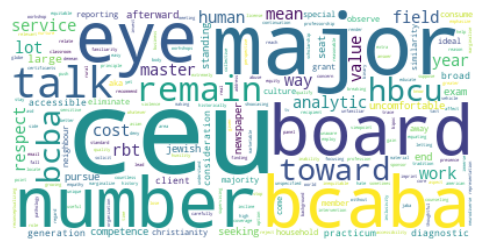

In [15]:
# Create wordcloud objects
wordcloud = WordCloud(background_color='white', 
                      max_words=200, 
                      contour_width=3, 
                      collocations=True)
wordcloud.generate(all_text)
wordcloud.to_image()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(f'./figures/wordcloud.png', bbox_inches='tight')
plt.show()

## LDA with Gensim

In [16]:
# LDA for all text responses
all_lda = lda_model_grid(df=df, col='token_text', t_start=2, t_end=20, params=False, savename=None)

Checking model with 2 topics.
Checking model with 3 topics.
Checking model with 4 topics.
Checking model with 5 topics.
Checking model with 6 topics.
Checking model with 7 topics.
Checking model with 8 topics.
Checking model with 9 topics.
Checking model with 10 topics.
Checking model with 11 topics.
Checking model with 12 topics.
Checking model with 13 topics.
Checking model with 14 topics.
Checking model with 15 topics.
Checking model with 16 topics.
Checking model with 17 topics.
Checking model with 18 topics.
Checking model with 19 topics.


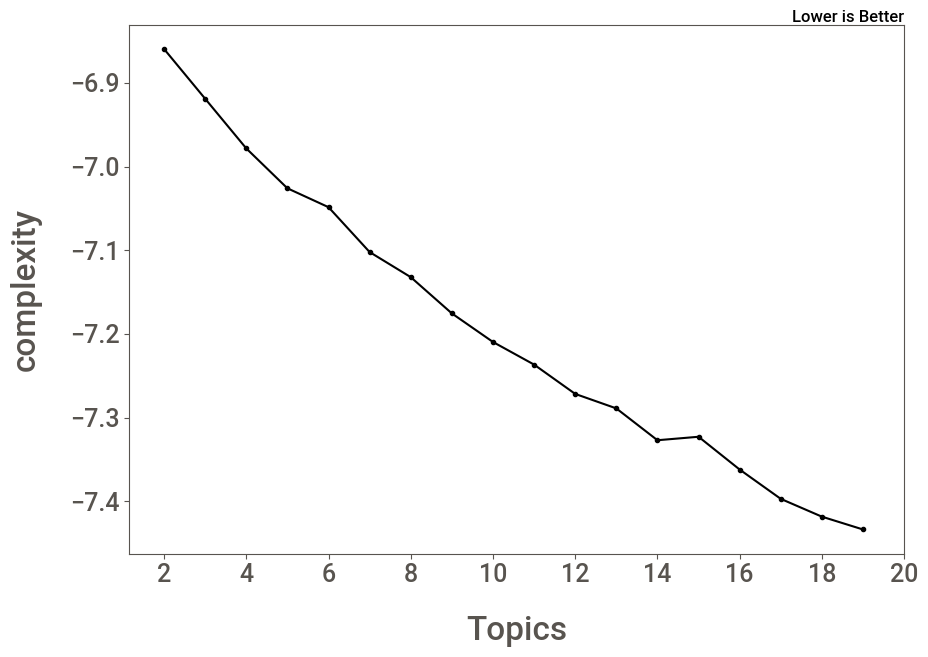

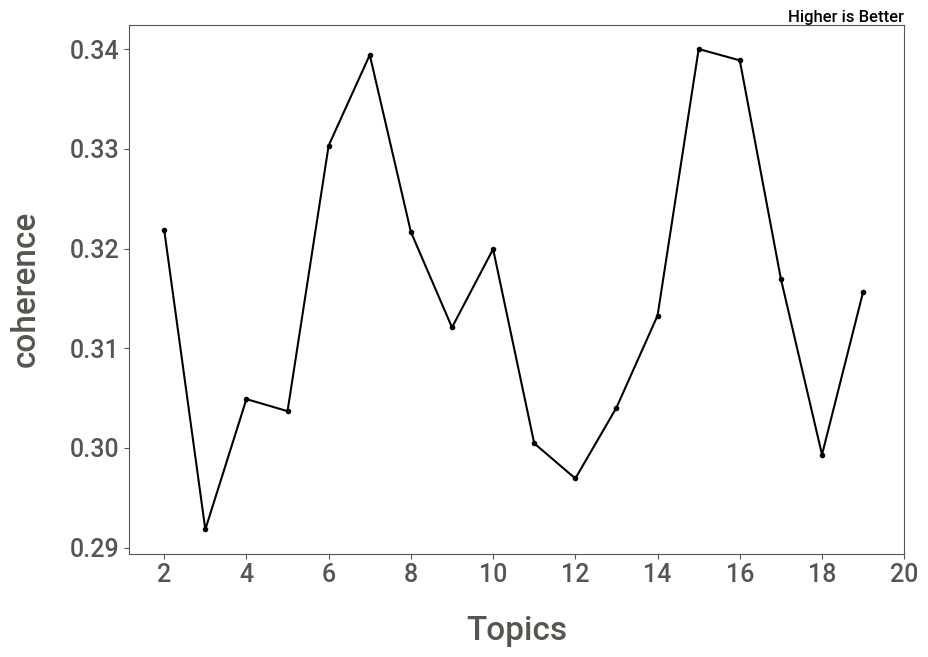

In [17]:
# Graph the results
line_plot(df=all_lda, col='complexity', save_name='complexity', title='Lower is Better')
line_plot(df=all_lda, col='coherence', save_name='coherence', title='Higher is Better')

## Build topic models using the least complex and most coherent number of topics. 

In [18]:
# 7 topics
topics = lda_model_grid(df=df, col='token_text', t_start=7, t_end=8, params=True, savename='actions_recommend_7')

Checking model with 7 topics.


In [19]:
# 15 topics
topics = lda_model_grid(df=df, col='token_text', t_start=15, t_end=16, params=True, savename='actions_recommend_15')

Checking model with 15 topics.


/usr/local/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the i